# About Dataset
The dataset could include various features and measurements related to the engine health of vehicles, such as engine RPM, temperature, pressure, and other sensor data. It may also include metadata on the vehicle, such as make, model, year, and mileage.

One potential project using this dataset could be to build a predictive maintenance model for automotive engines. By analyzing the patterns and trends in the data, machine learning algorithms could be trained to predict when an engine is likely to require maintenance or repair. This could help vehicle owners and mechanics proactively address potential issues before they become more severe, leading to better vehicle performance and longer engine lifetimes.

Another potential use for this dataset could be to analyze the performance of different types of engines and vehicles. Researchers could use the data to compare the performance of engines from different manufacturers, for example, or to evaluate the effectiveness of different maintenance strategies. This could help drive innovation and improvements in the automotive industry.

In [1]:
import pandas as pd
engdata = pd.read_csv("EngineCaseStudy/engine_data.csv")
engdata.head() # to load first 5 rows

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0


In [2]:
engdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        19535 non-null  int64  
 1   Lub oil pressure  19535 non-null  float64
 2   Fuel pressure     19535 non-null  float64
 3   Coolant pressure  19535 non-null  float64
 4   lub oil temp      19535 non-null  float64
 5   Coolant temp      19535 non-null  float64
 6   Engine Condition  19535 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.0 MB


In [3]:
engdata['Engine Condition'].unique()

array([1, 0])

In [4]:
engdata.describe()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
count,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000
mean,791.239263,3.303775,6.655615,2.335369,77.643420,78.427433,0.630509
std,267.611193,1.021643,2.761021,1.036382,3.110984,6.206749,0.482679
min,61.000000,0.003384,0.003187,0.002483,71.321974,61.673325,0.000000
25%,593.000000,2.518815,4.916886,1.600466,75.725990,73.895421,0.000000
50%,746.000000,3.162035,6.201720,2.166883,76.817350,78.346662,1.000000
75%,934.000000,4.055272,7.744973,2.848840,78.071691,82.915411,1.000000
max,2239.000000,7.265566,21.138326,7.478505,89.580796,195.527912,1.000000


# Detect Outliers and remove it

In [5]:
engdata.columns

Index(['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure',
       'lub oil temp', 'Coolant temp', 'Engine Condition'],
      dtype='object')

In [6]:
columns = engdata.columns
for column in columns:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = engdata[column].quantile(0.25)
    Q3 = engdata[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter the data to remove outliers
    engdata = engdata[(engdata[column] >= lower_bound) & (engdata[column] <= upper_bound)]

engdata


,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
5,1221,3.989226,6.679231,2.214250,76.401152,75.669818,0
7,729,3.845166,10.191126,2.362998,77.921202,71.671761,1
8,845,4.877239,3.638269,3.525604,76.301626,70.496024,0
9,824,3.741228,7.626214,1.301032,77.066520,85.143297,0
...,...,...,...,...,...,...,...
19529,797,3.368795,6.057227,1.721997,74.295698,75.222218,0
19530,902,4.117296,4.981360,4.346564,75.951627,87.925087,1
19532,684,2.673344,4.927376,1.903572,76.844940,86.337345,1
19533,696,3.094163,8.291816,1.221729,77.179693,73.624396,1


# Box plot for Outliers detection

C:\Users\gbb919982\AppData\Local\Temp\ipykernel_31696\2129296542.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot.values, labels=columns_to_plot, patch_artist=True)


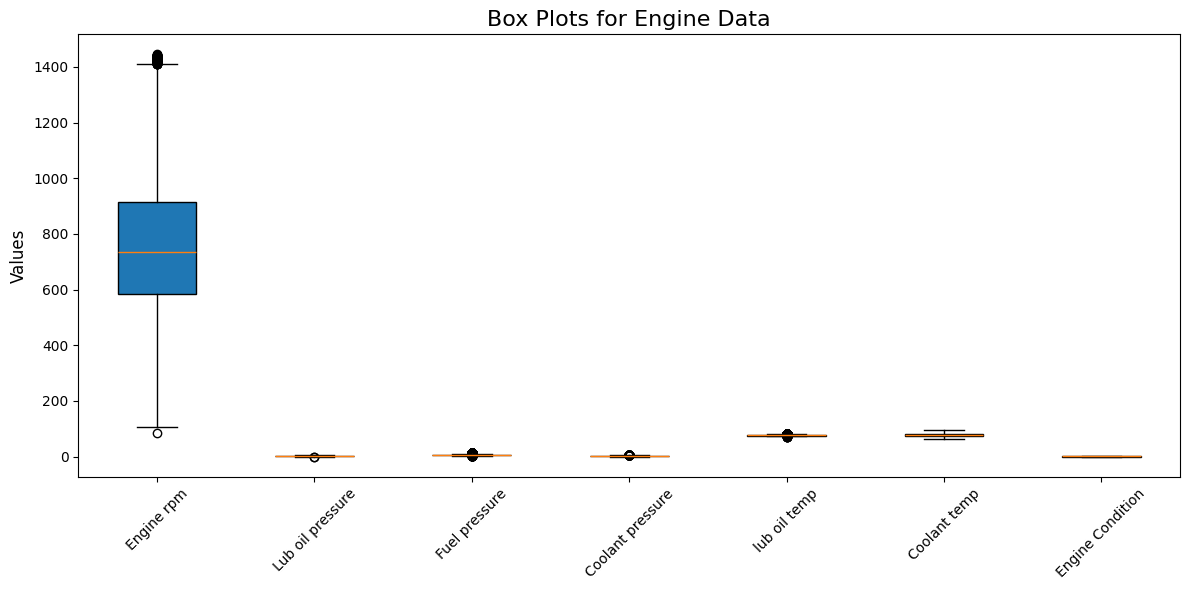

In [7]:
import matplotlib.pyplot as plt

# Assuming `engdata` is a predefined DataFrame
columns_to_plot = [
    'Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure',
    'lub oil temp', 'Coolant temp', 'Engine Condition'
]

# Extracting data for the box plot
data_to_plot = engdata[columns_to_plot]

# Creating the box plot
plt.figure(figsize=(12, 6))
plt.boxplot(data_to_plot.values, labels=columns_to_plot, patch_artist=True)

# Customizing the plot
plt.title('Box Plots for Engine Data', fontsize=16)
plt.ylabel('Values', fontsize=12)
plt.xticks(rotation=45, fontsize=10)  # Rotating x-axis labels for readability

# Display the plot
plt.tight_layout()
plt.show()


# About Data

### What does rpm mean in a car?
RPM stands for revolutions per minute and is a measure of how fast the engine is spinning. The faster an engine spins, the more power it makes. At a higher RPM, the engine is burning more fuel, so it makes more power and consumes more fuel.  In the instrument display, RPM is shown in a tachometer (also known as a rev counter) in multiples of thousands.

### What it measures
RPM measures how many times the engine's crankshaft rotates in one minute. It also measures the movement of each piston within its cylinder

### What it indicates
RPM is a key factor in determining a vehicle's power and performance. A higher RPM means the engine is spinning faster, making more power, and consuming more fuel.

### How it's displayed
A vehicle's RPM is displayed on the tachometer.

### How it's displayed
A vehicle's RPM is displayed on the tachometer.

### How to increase or decrease RPM
You can increase a car's RPM by installing a higher-performance clutch or changing the gear ratio. You can decrease a car's RPM by installing a lower-performance clutch or changing the gear ratio.

### Benefits of high RPM
High RPM can increase horsepower and torque, and help a car accelerate faster

### Risks of high RPM
High RPM can increase wear and tear on the engine and decrease fuel economy.

---
### What is Lub Oil Presure

Lub oil pressure, or lubrication oil pressure, refers to the pressure of the oil circulating within an engine's lubrication system. This pressure is crucial for ensuring proper lubrication and cooling of the engine's moving par

Lubricating oil pressure is the pressure of the oil that lubricates the bearings in an engine or turbine. The pressure is usually kept constant and is typically between 100–150 kPa. However, the ideal oil pressure varies by car brand and model, and can range from 25–65 PSI

The ideal oil pressure range varies depending on the engine type, size, and operating conditions. However, a general guideline is

Normal Range: 20-65 PSI at operating temperature.

Low Oil Pressure: Below 20 PSI. This can indicate insufficient oil, a faulty oil pump, or blocked oil passages.

Engine RPM: Higher RPMs generally lead to higher oil pressure.

---
### How is Coolant Pressure Calculated?

While coolant pressure isn't calculated in a direct mathematical sense, it's regulated by a specific component: the radiator cap. The radiator cap is designed to maintain a specific pressure within the cooling system.

---
### What is Lub oil temp
Lub oil temp, or lubricant oil temperature, refers to the temperature of the oil circulating within an engine's lubrication system.

Normal Range: 180-220 degrees Fahrenheit (82-104 degrees Celsius).

---
### What is Coolant Temperature?

Coolant temperature refers to the temperature of the fluid circulating through your engine's cooling system. This fluid, a mixture of water and antifreeze, is essential for maintaining optimal engine operating temperature

**Normal Coolant Temperature Range**

A typical operating temperature for most engines is between 195°F and 220°F (90°C to 104°C). However, specific temperature ranges can vary depending on the vehicle and driving conditions.

---
## Engine Condition: A Complex Assessment

**Engine condition** is a broad term that encompasses the overall health and performance of an engine. It's influenced by various factors, including:

* **Wear and Tear:** The cumulative effect of usage and time.
* **Maintenance:** Regular servicing and component replacement.
* **Driving Habits:** Aggressive driving or neglect can accelerate deterioration.
* **Environmental Factors:** Exposure to harsh conditions like extreme temperatures or dusty environments.

**Assessing Engine Condition**

While there's no single, definitive calculation for engine condition, a combination of methods is used to assess its health:

1. **Visual Inspection:**
   * Checking for leaks, corrosion, and physical damage.
   * Examining the engine's exterior for signs of overheating or neglect.

2. **Compression Test:**
   * Measuring the pressure inside each cylinder.
   * Low compression can indicate worn piston rings, valve problems, or other issues.

3. **Oil Analysis:**
   * Analyzing the oil for contaminants, metal particles, and additives.
   * This can reveal internal wear and potential problems.

4. **Performance Testing:**
   * Evaluating power output, fuel efficiency, and emissions.
   * Deviations from normal performance can indicate underlying issues.

5. **Diagnostic Scans:**
   * Using specialized tools to read diagnostic trouble codes (DTCs).
   * DTCs can provide clues about specific problems within the engine.

6. **Expert Evaluation:**
   * Consulting a qualified mechanic for a thorough assessment.
   * A mechanic can identify potential issues and recommend necessary repairs.

**Key Indicators of Engine Health**

* **Oil Consumption:** Excessive oil consumption can signal internal engine wear.
* **Exhaust Smoke:** Blue smoke often indicates oil burning, while black smoke can signal fuel-related issues.
* **Engine Noise:** Unusual noises like knocking, ticking, or rattling can be signs of problems.
* **Performance Loss:** Decreased power, sluggish acceleration, or poor fuel economy can indicate engine issues.
* **Check Engine Light:** A illuminated check engine light often signals a problem that needs attention.

**Remember:**

* Regular maintenance, including oil changes and filter replacements, is crucial for maintaining engine health.
* Avoid aggressive driving habits and excessive idling.
* Pay attention to warning signs and address issues promptly.

By combining these methods and considering the specific factors affecting engine condition, you can gain a comprehensive understanding of your engine's health and take steps to ensure its longevity.



# Let's find is there any relation bettween engine RPM and pressure

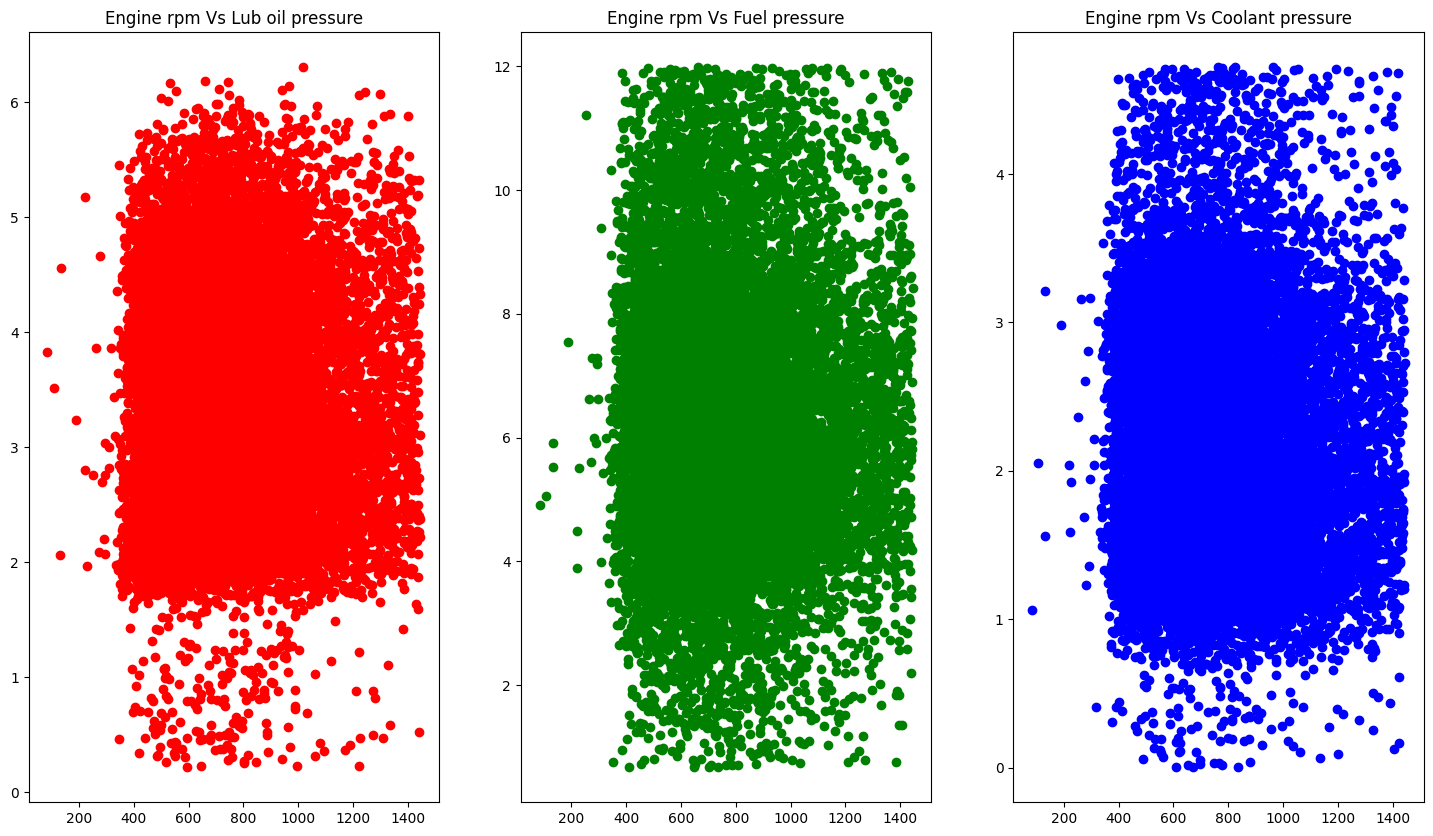

In [8]:
import matplotlib.pyplot as plt

# Creating subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 10))

# Creating a scatter plot

x = engdata['Engine rpm']
y1 = engdata['Lub oil pressure']
y2 = engdata['Fuel pressure']
y3 = engdata['Coolant pressure']


# Plotting data in each subplot
axs[0].scatter(x, y1, color='red')
axs[0].set_title('Engine rpm Vs Lub oil pressure')


# Plotting data in each subplot
axs[1].scatter(x, y2, color='green')
axs[1].set_title('Engine rpm Vs Fuel pressure')

# Plotting data in each subplot
axs[2].scatter(x, y3, color='blue')
axs[2].set_title('Engine rpm Vs Coolant pressure')


# Displaying the plot
plt.show()

## Observation
- Can't find any relation between **Engine rpm** and **Lub oil pressure, Fuel pressure, Coolant pressure**
---

# Let's find is there any relation bettween engine RPM and temperature

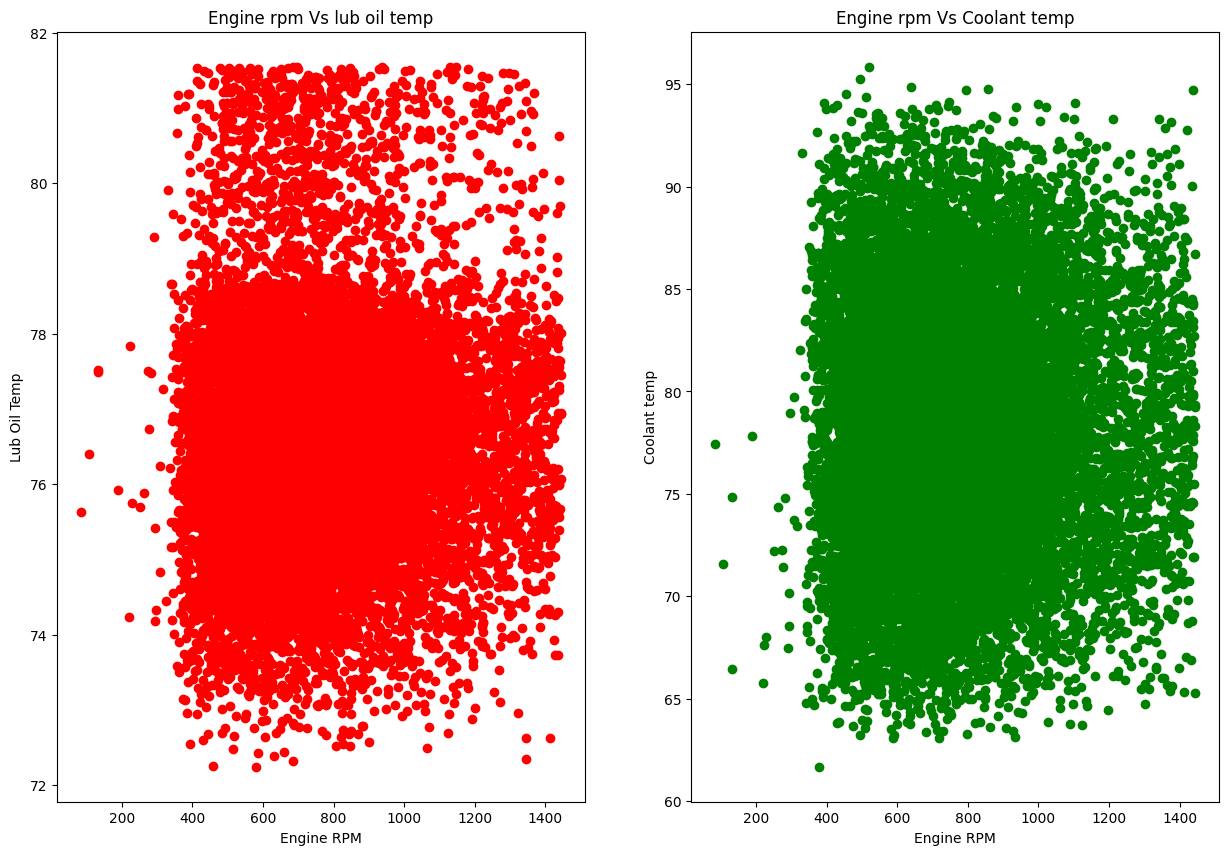

In [9]:
import matplotlib.pyplot as plt

# Creating subplots
fig, axtmps= plt.subplots(1, 2, figsize=(15, 10))

# Creating a scatter plot

rpm = engdata['Engine rpm']
temp1 = engdata['lub oil temp']
temp2 = engdata['Coolant temp']


# Plotting data in each subplot
axtmps[0].scatter(rpm, temp1, color='red')
axtmps[0].set_title('Engine rpm Vs lub oil temp')
axtmps[0].set_xlabel('Engine RPM')
axtmps[0].set_ylabel('Lub Oil Temp')


# Plotting data in each subplot
axtmps[1].scatter(rpm, temp2, color='green')
axtmps[1].set_title('Engine rpm Vs Coolant temp')
axtmps[1].set_xlabel('Engine RPM')
axtmps[1].set_ylabel('Coolant temp')

# Displaying the plot
plt.show()

### Observation
- Can't find any relation with rpm and pressure
---

# Let's find any relation ship between temperature and pressure

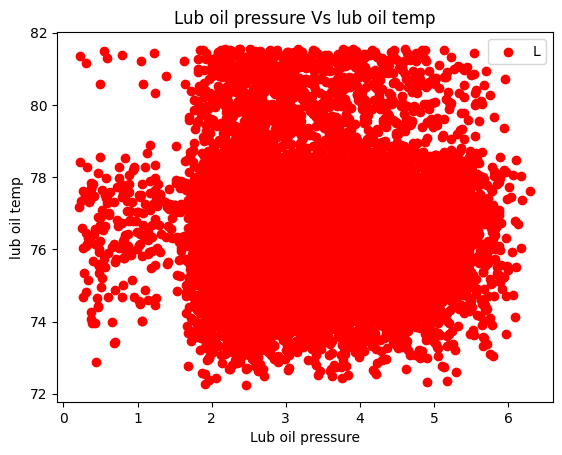

In [45]:
import matplotlib.pyplot as plt

# Creating subplots
# fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Creating a scatter plot

lbp = engdata['Lub oil pressure']
lbt = engdata['lub oil temp']


# Plotting data in each subplot
plt.scatter(lbp, lbt, color='red')


# Adding labels and title
plt.xlabel('Lub oil pressure')
plt.ylabel('lub oil temp')
plt.title('Lub oil pressure Vs lub oil temp')

# Adding a legend
plt.legend("Lub oil : pressure vs temp")

# Displaying the plot
plt.show()

# Let's find any relation ship between Lub oil pressure Fuel pressure

C:\Users\gbb919982\AppData\Local\Temp\ipykernel_31696\3971393904.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


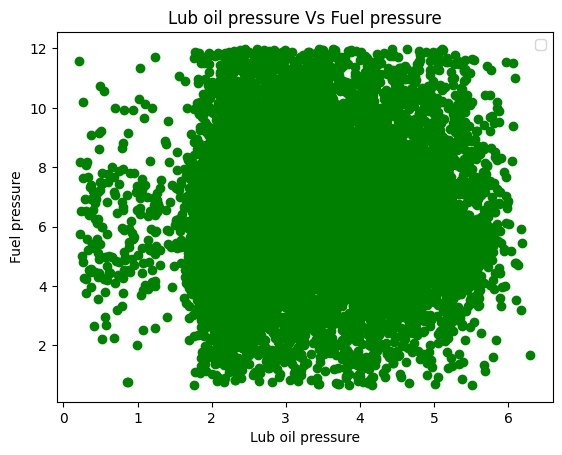

In [11]:
import matplotlib.pyplot as plt

# Creating subplots
# fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Creating a scatter plot

lbp = engdata['Lub oil pressure']
flp = engdata['Fuel pressure']


# Plotting data in each subplot
plt.scatter(lbp, flp, color='green')


# Adding labels and title
plt.xlabel('Lub oil pressure')
plt.ylabel('Fuel pressure')
plt.title('Lub oil pressure Vs Fuel pressure')

# Adding a legend
plt.legend()

# Displaying the plot
plt.show()

# Let's find any relation ship between Coolant pressure, Coolant temp

C:\Users\gbb919982\AppData\Local\Temp\ipykernel_31696\1117673282.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


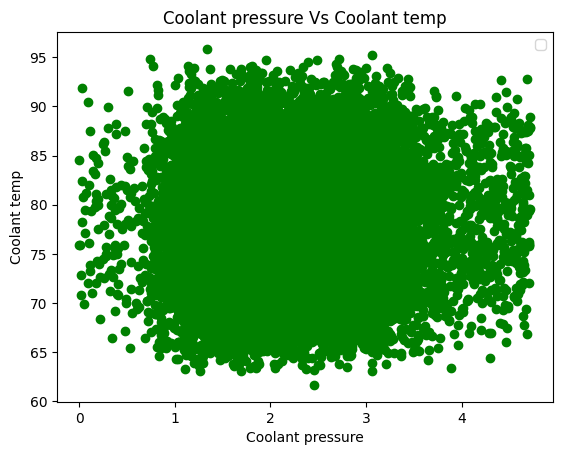

In [12]:
import matplotlib.pyplot as plt

# Creating subplots
# fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Creating a scatter plot

lbp = engdata['Coolant pressure']
flp = engdata['Coolant temp']


# Plotting data in each subplot
plt.scatter(lbp, flp, color='green')


# Adding labels and title
plt.xlabel('Coolant pressure')
plt.ylabel('Coolant temp')
plt.title('Coolant pressure Vs Coolant temp')

# Adding a legend
plt.legend()

# Displaying the plot
plt.show()

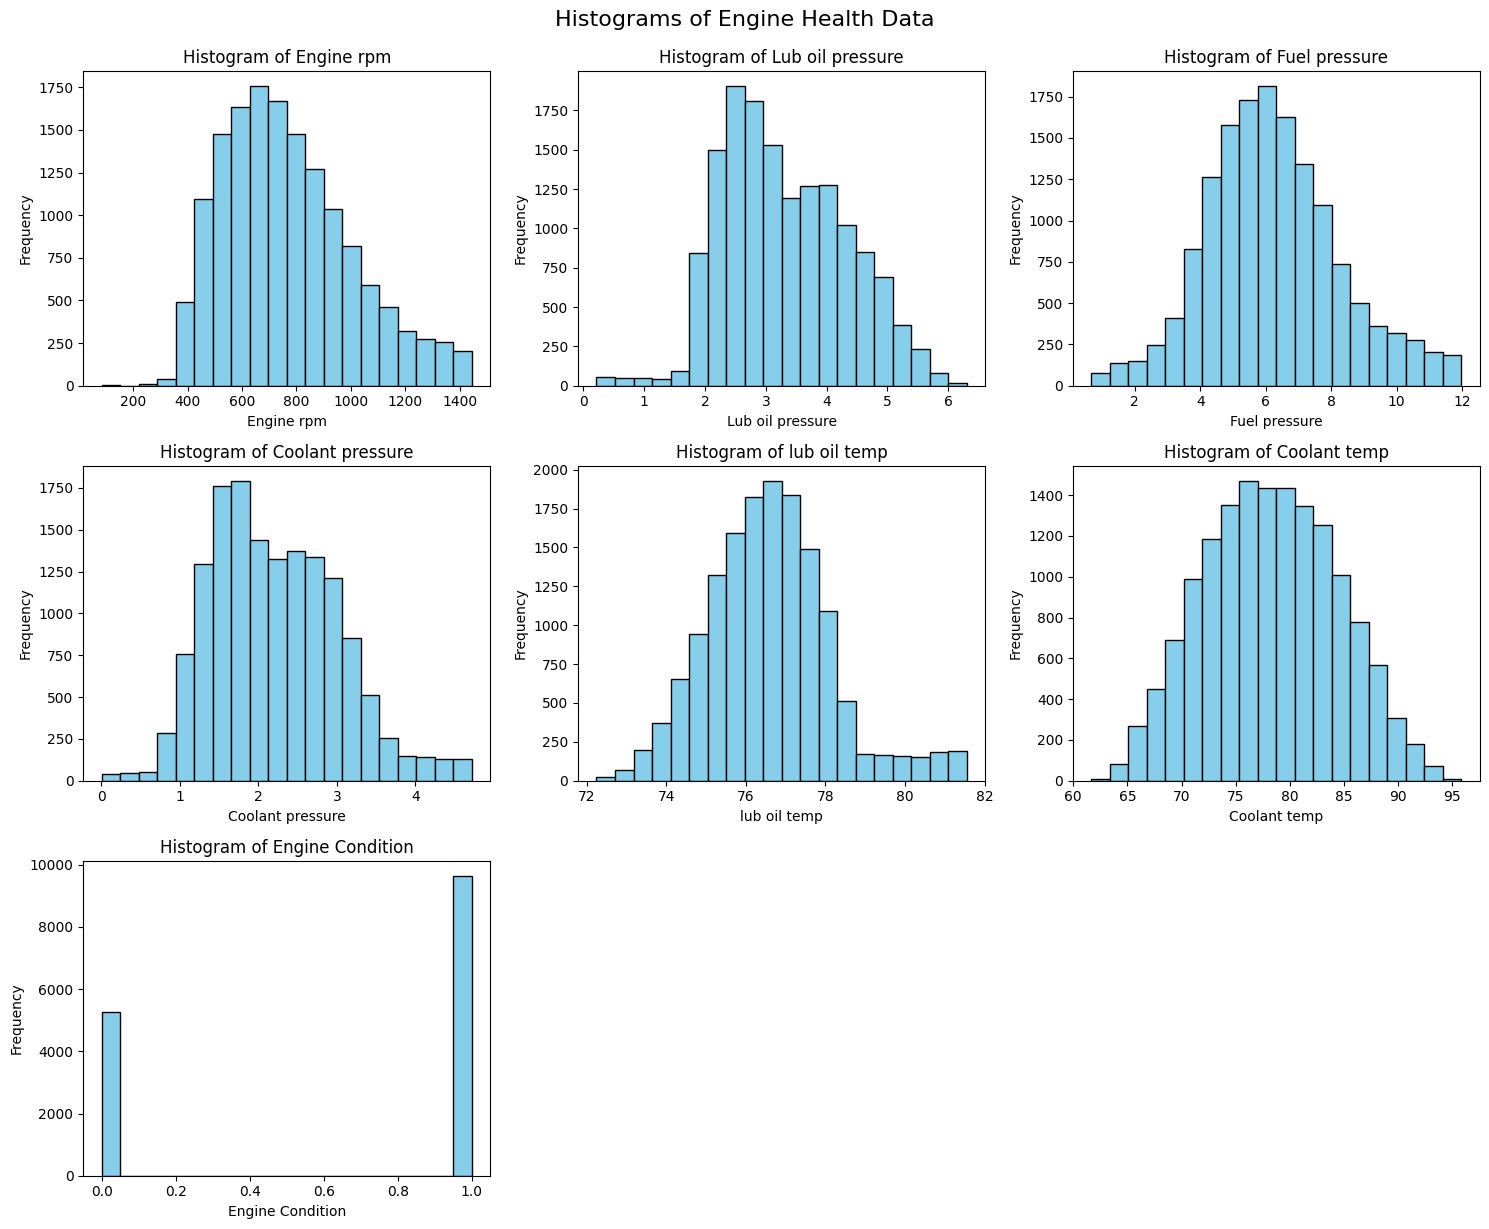

In [13]:
import matplotlib.pyplot as plt

# List of columns to plot
numerical_columns = [
    'Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure',
    'lub oil temp', 'Coolant temp', 'Engine Condition'
]

# Create histograms
plt.figure(figsize=(15, 12))  # Set figure size for all plots
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)  # Create a 3x3 grid of subplots
    plt.hist(engdata[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}', fontsize=12)
    plt.xlabel(column, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)

plt.tight_layout()  # Adjust spacing
plt.suptitle('Histograms of Engine Health Data', fontsize=16, y=1.02)  # Add a main title
plt.show()


## Observation

- Engine RPM: The distribution of engine RPM shows a roughly symmetric or normal distribution, indicating that most engine RPM values are clustered around the center with fewer extreme values on either side.

- Oil Pressure, Fuel Pressure, and Coolant Pressure: These distributions also appear to have a bell-shaped or normal distribution, suggesting that most readings are around a common range with outliers or lower occurrences at the edges.

- The histogram for coolant temperature is close to a perfect bell curve, indicating a strong normal distribution. This suggests that coolant temperatures typically stay within a certain range, with minimal deviation.

The coolant temperature distribution shows the most typical bell-curve pattern, indicating consistent performance.

The engine condition data may imply a bimodal distribution or the presence of distinct subgroups within the dataset.

# Correlation Analysis

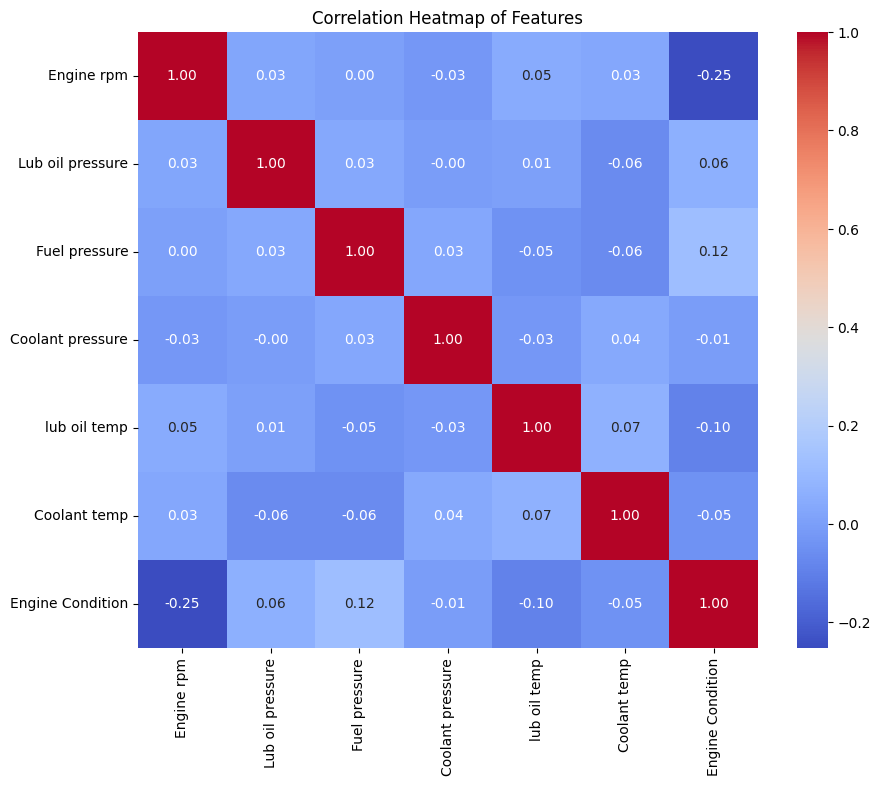

In [14]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(engdata.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()


# Pairplot

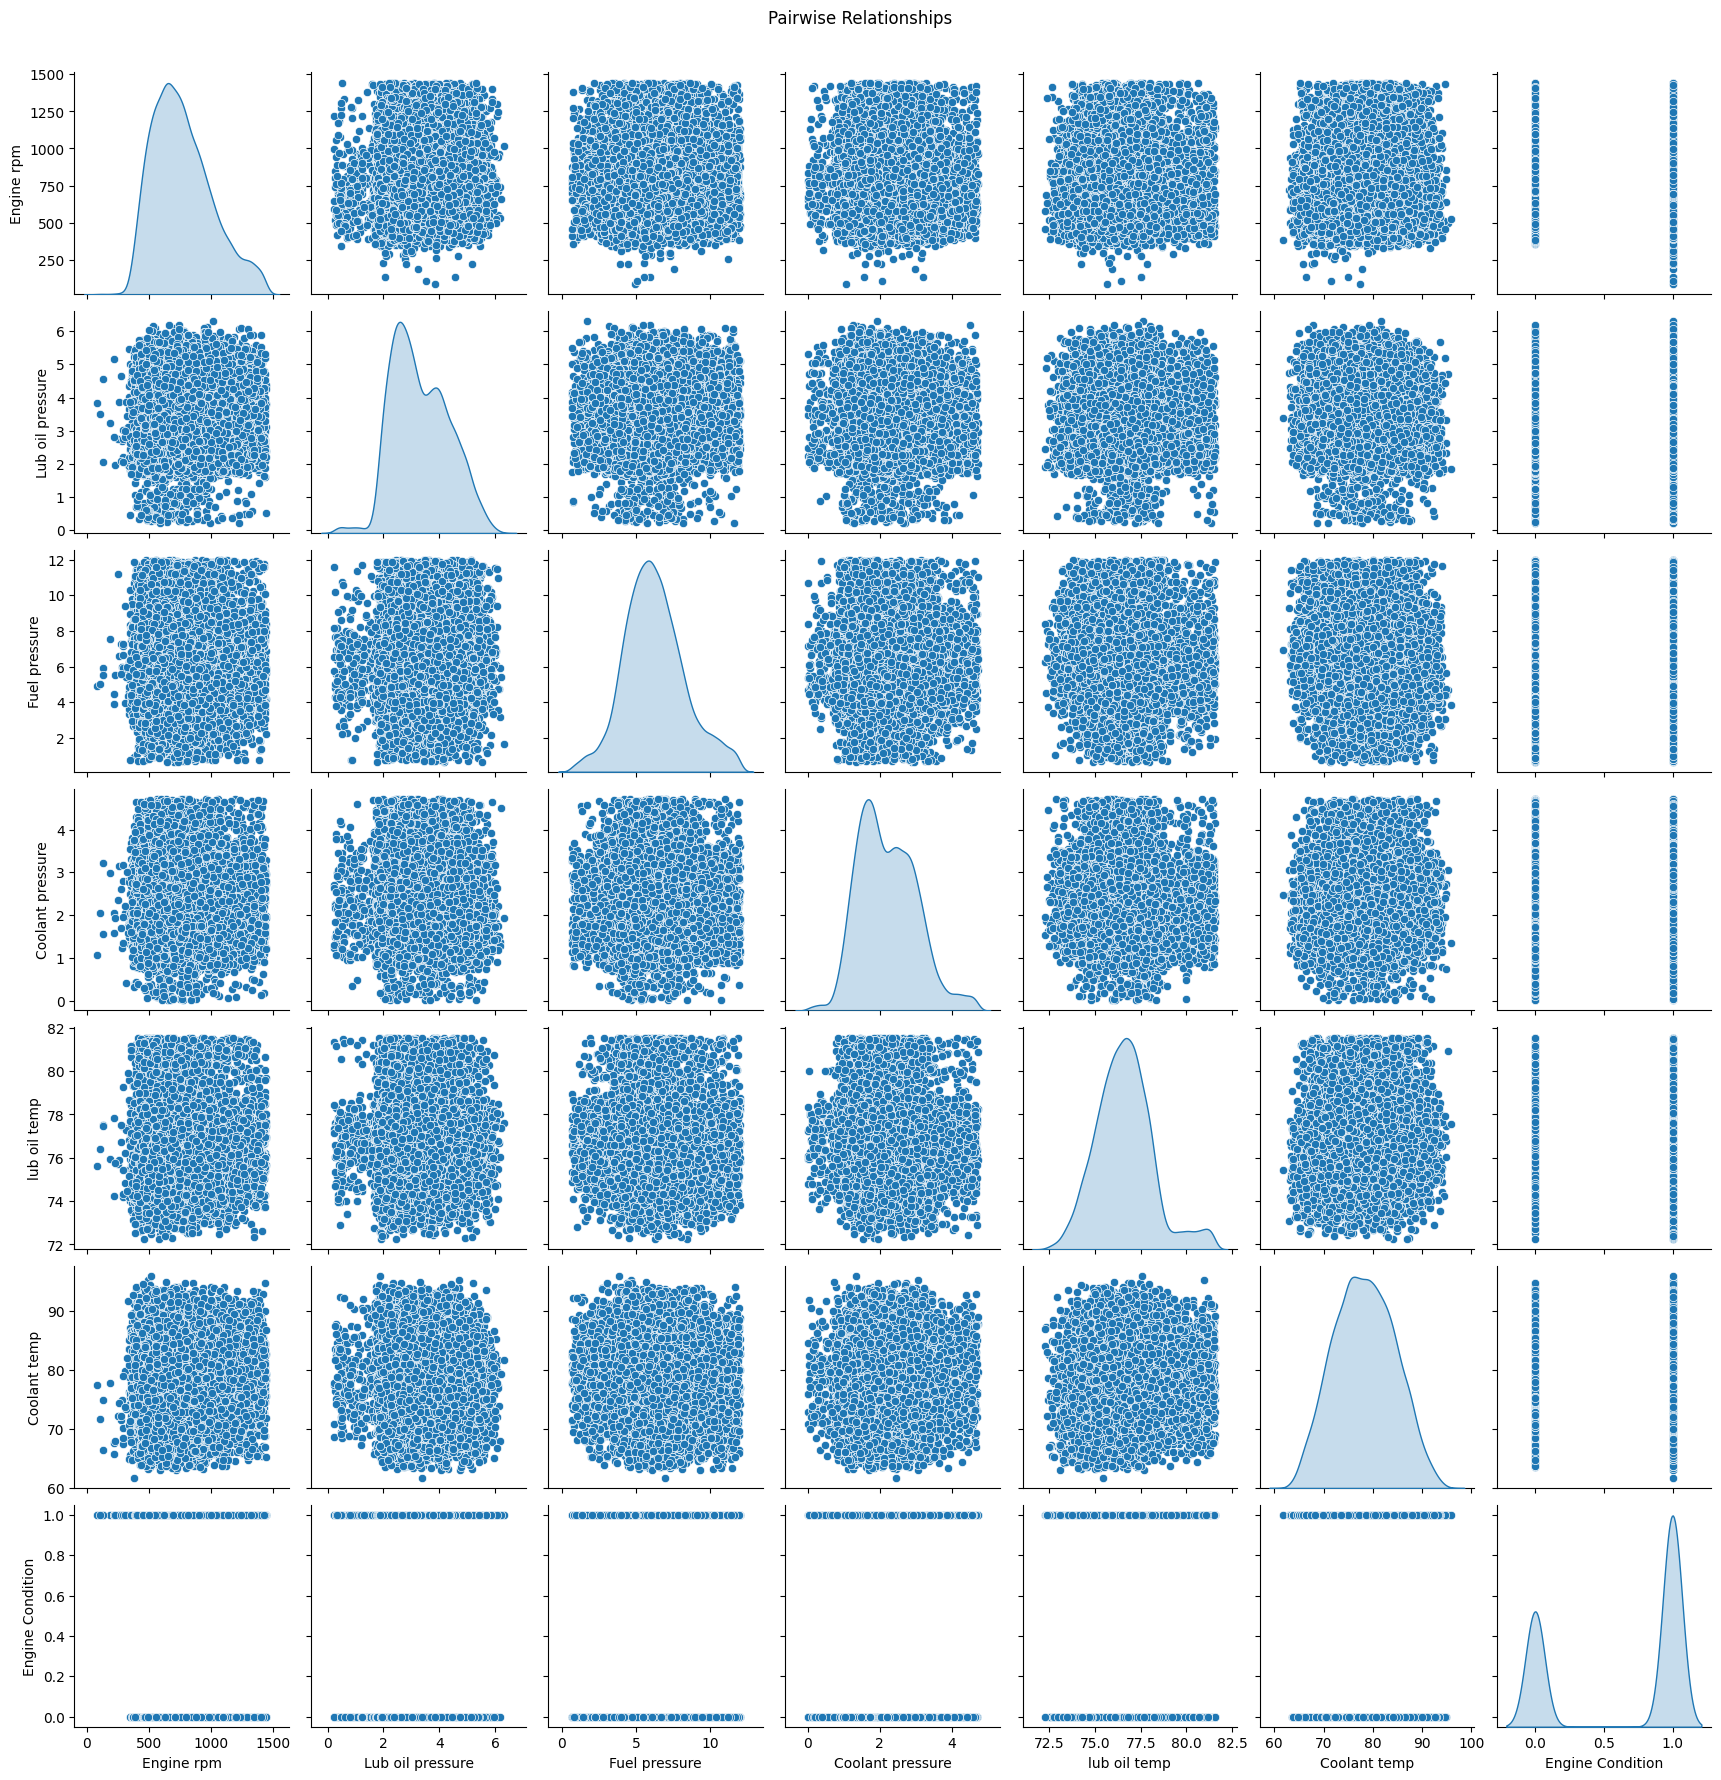

In [15]:
sns.pairplot(engdata, vars=numerical_columns, diag_kind='kde')
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()


In [16]:
#  ratios between temperature and pressure (e.g., Lub oil temp/Coolant temp).

# feature selection

In [17]:
engdata.columns

Index(['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure',
       'lub oil temp', 'Coolant temp', 'Engine Condition'],
      dtype='object')

In [18]:
features = engdata[['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure', 'lub oil temp', 'Coolant temp']]

target = engdata['Engine Condition']

print("Features shape:", features.shape)
print("Target shape:", target.shape)

Features shape: (14884, 6)
Target shape: (14884,)


In [19]:
target, features

(2        1
 5        0
 7        1
 8        0
 9        0
         ..
 19529    0
 19530    1
 19532    1
 19533    1
 19534    1
 Name: Engine Condition, Length: 14884, dtype: int64,
        Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
 2             520          2.961746       6.553147          1.064347   
 5            1221          3.989226       6.679231          2.214250   
 7             729          3.845166      10.191126          2.362998   
 8             845          4.877239       3.638269          3.525604   
 9             824          3.741228       7.626214          1.301032   
 ...           ...               ...            ...               ...   
 19529         797          3.368795       6.057227          1.721997   
 19530         902          4.117296       4.981360          4.346564   
 19532         684          2.673344       4.927376          1.903572   
 19533         696          3.094163       8.291816          1.221729   
 19534     

# Train Test Split

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Ml Model Prepration


## Regression
---

### Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression

# Train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Lasso Regression

In [22]:
from sklearn.linear_model import Lasso


# Train the model
lassor_model = Lasso(alpha=0.1, random_state=42)
lassor_model.fit(X_train, y_train)

,alpha,0.1
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,42
,selection,'cyclic'


### Ridge Regression

In [23]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train, y_train)


,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,42


# KNN
### KNN regression

In [24]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn_reg.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'euclidean'
,metric_params,None
,n_jobs,None


---
---

## Classification
---

In [25]:
from sklearn.metrics import accuracy_score, f1_score

### Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

# Train the model
logr_model = LogisticRegression(solver = 'liblinear', random_state = 0)
logr_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


### Prediction and evaluation

In [27]:
logr_model_pred = logr_model.predict(X_test)

logr_modelaccuracy = accuracy_score(y_test, logr_model_pred)
logr_modelf1 = f1_score(y_test, logr_model_pred)

print("Accuracy Score: ",logr_modelaccuracy)
print("F1 Score: ",logr_modelf1)

Accuracy Score:  0.6567013772253947
F1 Score:  0.7688828584350973


### KNN Classification

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_clf.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'euclidean'
,metric_params,None
,n_jobs,None


### Prediction and evaluation

In [29]:
knn_clf_pred = knn_clf.predict(X_test)

knn_clfaccuracy = accuracy_score(y_test, knn_clf_pred)
knn_clff1 = f1_score(y_test, knn_clf_pred)

print("Accuracy Score: ",knn_clfaccuracy)
print("F1 Score: ",knn_clff1)

Accuracy Score:  0.60900235136043
F1 Score:  0.711738484398217


## RandomForestClassifier

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Predection and evaluation

In [31]:
rf_clf_pred = rf_clf.predict(X_test)

rf_clfaccuracy = accuracy_score(y_test, rf_clf_pred)
rf_clff1 = f1_score(y_test, rf_clf_pred)

print("Accuracy Score: ",rf_clfaccuracy)
print("F1 Score: ",rf_clff1)

Accuracy Score:  0.6553577426939873
F1 Score:  0.7566413662239089


## Naive bayes

In [32]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

### Gaussian Naive Bayes

In [33]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


### Predection and evaluation

In [34]:
gnb_pred = gnb.predict(X_test)

gnbaccuracy = accuracy_score(y_test, gnb_pred)
gnbf1 = f1_score(y_test, gnb_pred)

print("Accuracy Score: ",gnbaccuracy)
print("F1 Score: ",gnbf1)

Accuracy Score:  0.6650990930466913
F1 Score:  0.7734605771415587


### Multinomial Naive Bayes

In [35]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


### Predection and evaluation

In [36]:
mnb_pred = mnb.predict(X_test)

mnbaccuracy = accuracy_score(y_test, mnb_pred)
mnbf1 = f1_score(y_test, mnb_pred)

print("Accuracy Score: ",mnbaccuracy)
print("F1 Score: ",mnbf1)

Accuracy Score:  0.6348673160900236
F1 Score:  0.707874227358237


### Bernoulli Naive Bayes

In [37]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,binarize,0.0
,fit_prior,True
,class_prior,None


### Predectiona and evaluation

In [38]:
bnb_pred = bnb.predict(X_test)

bnbaccuracy = accuracy_score(y_test, bnb_pred)
bnbf1 = f1_score(y_test, bnb_pred)

print("Accuracy Score: ",bnbaccuracy)
print("F1 Score: ",bnbf1)

Accuracy Score:  0.6429291232784683
F1 Score:  0.7826620323042323


## Support Vector Machine (SVM)

In [39]:
from sklearn.svm import SVC

### Linear Kernel: Use for linearly separable data.

In [40]:

svc1 = SVC(kernel='linear', C=1.0)
svc1.fit(X_train, y_train)


,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


### Predection and evaluation

In [41]:
svc1_pred = svc1.predict(X_test)

svc1accuracy = accuracy_score(y_test, svc1_pred)
svc1f1 = f1_score(y_test, svc1_pred)

print("Accuracy Score: ",svc1accuracy)
print("F1 Score: ",svc1f1)

Accuracy Score:  0.663419549882432
F1 Score:  0.7720655141037307


### RBF Kernel: Use for non-linear data.

In [42]:
svc2 = SVC(kernel='rbf', C=1.0, gamma='scale')
svc2.fit(X_train, y_train)


,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


### Predection and evaluation

In [43]:
svc2_pred = svc2.predict(X_test)

svc2accuracy = accuracy_score(y_test, svc2_pred)
svc2f1 = f1_score(y_test, svc2_pred)

print("Accuracy Score: ",svc2accuracy)
print("F1 Score: ",svc2f1)

Accuracy Score:  0.6452804837084313
F1 Score:  0.7758913412563667


## Gradient Boosting

In [44]:
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor

ModuleNotFoundError: No module named 'lightgbm'

### XGBoost

In [ ]:
XGB_Cmodel = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
XGB_Cmodel.fit(X_train, y_train)

### Predection and evaluation

In [ ]:
XGB_Cmodel_pred = XGB_Cmodel.predict(X_test)

XGB_Cmodelaccuracy = accuracy_score(y_test, XGB_Cmodel_pred)
XGB_Cmodelf1 = f1_score(y_test, XGB_Cmodel_pred)

print("Accuracy Score: ",XGB_Cmodelaccuracy)
print("F1 Score: ",XGB_Cmodelf1)

### LightGBM:

In [ ]:
LGBMmodel = LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
LGBMmodel.fit(X_train, y_train)

### Predection and Evaluation

In [ ]:
LGBMmodel_pred = LGBMmodel.predict(X_test)

LGBMmodelaccuracy = accuracy_score(y_test, LGBMmodel_pred)
LGBMmodelf1 = f1_score(y_test, LGBMmodel_pred)

print("Accuracy Score: ",LGBMmodelaccuracy)
print("F1 Score: ",LGBMmodelf1)


In [ ]:
inpfeatures = [[800,2.941606,20.510172, 3.178981, 78.396989, 79.645777]]
op_pred = LGBMmodel.predict(inpfeatures)
print(op_pred)